In [1]:
import requests
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from config import api_key
from datetime import datetime
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


### Gold Data - CSV Download

Gold data from https://www.investing.com/currencies/xau-usd-historical-data

In [2]:
data = pd.read_csv('resources/XAU_USD Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Change %
0,"Dec 31, 2020","1,893.81","1,895.22","1,900.40","1,885.55",0.02%
1,"Dec 30, 2020","1,893.37","1,878.34","1,894.06","1,875.66",0.82%
2,"Dec 29, 2020","1,877.99","1,872.24","1,886.91","1,870.99",0.36%
3,"Dec 28, 2020","1,871.19","1,885.93","1,900.53","1,869.21",-0.25%
4,"Dec 25, 2020","1,875.82","1,877.07","1,877.07","1,877.07",-0.04%


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Change %
0,2020-12-31,"1,893.81","1,895.22","1,900.40","1,885.55",0.02%
1,2020-12-30,"1,893.37","1,878.34","1,894.06","1,875.66",0.82%
2,2020-12-29,"1,877.99","1,872.24","1,886.91","1,870.99",0.36%
3,2020-12-28,"1,871.19","1,885.93","1,900.53","1,869.21",-0.25%
4,2020-12-25,"1,875.82","1,877.07","1,877.07","1,877.07",-0.04%


In [4]:
data = data.drop(['Open', 'Change %'], axis=1)
data

,Date,Price,High,Low
0,2020-12-31,"1,893.81","1,900.40","1,885.55"
1,2020-12-30,"1,893.37","1,894.06","1,875.66"
2,2020-12-29,"1,877.99","1,886.91","1,870.99"
3,2020-12-28,"1,871.19","1,900.53","1,869.21"
4,2020-12-25,"1,875.82","1,877.07","1,877.07"
...,...,...,...,...
2860,2010-01-07,"1,132.30","1,139.15","1,128.60"
2861,2010-01-06,"1,138.90","1,140.60","1,116.00"
2862,2010-01-05,"1,119.05","1,128.10","1,115.25"
2863,2010-01-04,"1,120.40","1,123.80","1,093.45"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2865 non-null   datetime64[ns]
 1   Price   2865 non-null   object        
 2   High    2865 non-null   object        
 3   Low     2865 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 89.7+ KB


In [6]:
data["Price"] = data["Price"].str.replace(",","").astype(float)
data["High"] = data["High"].str.replace(",","").astype(float)
data["Low"] = data["Low"].str.replace(",","").astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2865 non-null   datetime64[ns]
 1   Price   2865 non-null   float64       
 2   High    2865 non-null   float64       
 3   Low     2865 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 89.7 KB


### Bitcoin Data - API Call

Bitcoin data below from https://www.alphavantage.co/

In [8]:
# URL for GET requests to retrieve bitcoin data
#from config import AV_KEY
#url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=AV_KEY"

In [9]:
# Pretty print JSON for a specific launchpad
#response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

Bitcoin data below from https://www.quandl.com/

In [10]:
#import quandl
#from config import QUANDL_KEY
# quandl.ApiConfig.api_key = QUANDL_KEY
# bit_df = quandl.get('BITSTAMP/USD')
# bit_df

Bitcoin historical data below from https://api.tiingo.com/

In [11]:
url = "https://api.tiingo.com/tiingo/crypto/prices?"

# GET requests to retrieve bitcoin data

headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get(url + "tickers=btcusd&startDate=2010-01-01&resampleFreq=1Day&token=" + api_key, headers=headers).json()
#print(requestResponse.json())
print(json.dumps(requestResponse, indent=4, sort_keys=True))


[
    {
        "baseCurrency": "btc",
        "priceData": [
            {
                "close": 10.9,
                "date": "2011-08-19T00:00:00+00:00",
                "high": 10.9,
                "low": 10.9,
                "open": 10.9,
                "tradesDone": 0.0,
                "volume": 0.49,
                "volumeNotional": 5.341
            },
            {
                "close": 11.69,
                "date": "2011-08-20T00:00:00+00:00",
                "high": 11.85,
                "low": 11.15,
                "open": 11.85,
                "tradesDone": 0.0,
                "volume": 1.93,
                "volumeNotional": 22.5617
            },
            {
                "close": 11.7,
                "date": "2011-08-21T00:00:00+00:00",
                "high": 11.7,
                "low": 11.7,
                "open": 11.7,
                "tradesDone": 0.0,
                "volume": 0.09,
                "volumeNotional": 1.053
            },
     

In [12]:
# create a data frame

from pandas import json_normalize

BTC_df = json_normalize(requestResponse, 'priceData')
BTC_df

,tradesDone,volume,open,date,close,volumeNotional,low,high
0,0.0,0.490000,10.900000,2011-08-19T00:00:00+00:00,10.900000,5.341000e+00,10.900000,10.900000
1,0.0,1.930000,11.850000,2011-08-20T00:00:00+00:00,11.690000,2.256170e+01,11.150000,11.850000
2,0.0,0.090000,11.700000,2011-08-21T00:00:00+00:00,11.700000,1.053000e+00,11.700000,11.700000
3,0.0,0.090000,11.700000,2011-08-22T00:00:00+00:00,11.700000,1.053000e+00,11.700000,11.700000
4,0.0,0.030000,11.700000,2011-08-23T00:00:00+00:00,11.700000,3.510000e-01,11.700000,11.700000
...,...,...,...,...,...,...,...,...
3385,2737176.0,193809.358248,26485.284911,2020-12-27T00:00:00+00:00,26306.962487,5.098536e+09,25700.757443,28408.348992
3386,1639753.0,104526.631497,26431.618384,2020-12-28T00:00:00+00:00,27070.992204,2.829640e+09,26145.448407,27491.939260
3387,1704956.0,94267.410996,27069.306677,2020-12-29T00:00:00+00:00,27375.298685,2.580599e+09,25869.281314,27400.042672
3388,2028704.0,126424.451013,27371.433391,2020-12-30T00:00:00+00:00,28880.919015,3.651254e+09,27341.863838,28995.146723


In [13]:
BTC_df = BTC_df.drop(['tradesDone', 'volume', 'open', 'high', 'volumeNotional', 'low'], axis=1)
BTC_df.head()

,date,close
0,2011-08-19T00:00:00+00:00,10.90
1,2011-08-20T00:00:00+00:00,11.69
2,2011-08-21T00:00:00+00:00,11.70
3,2011-08-22T00:00:00+00:00,11.70
4,2011-08-23T00:00:00+00:00,11.70


In [14]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3390 non-null   object 
 1   close   3390 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.1+ KB


In [15]:
BTC_df['date'] = BTC_df['date'].astype('datetime64')
BTC_df.head()

,date,close
0,2011-08-19,10.90
1,2011-08-20,11.69
2,2011-08-21,11.70
3,2011-08-22,11.70
4,2011-08-23,11.70


In [16]:
BTC_df = BTC_df[::-1]
BTC_df

,date,close
3389,2020-12-31,28900.517678
3388,2020-12-30,28880.919015
3387,2020-12-29,27375.298685
3386,2020-12-28,27070.992204
3385,2020-12-27,26306.962487
...,...,...
4,2011-08-23,11.700000
3,2011-08-22,11.700000
2,2011-08-21,11.700000
1,2011-08-20,11.690000


In [17]:
BTC_df = BTC_df.reset_index(drop=True)
BTC_df

,date,close
0,2020-12-31,28900.517678
1,2020-12-30,28880.919015
2,2020-12-29,27375.298685
3,2020-12-28,27070.992204
4,2020-12-27,26306.962487
...,...,...
3385,2011-08-23,11.700000
3386,2011-08-22,11.700000
3387,2011-08-21,11.700000
3388,2011-08-20,11.690000


In [18]:
BTC_df = BTC_df.rename(columns={'date': 'Date', 'close': 'BTC_Price'})
BTC_df.head()

,Date,BTC_Price
0,2020-12-31,28900.517678
1,2020-12-30,28880.919015
2,2020-12-29,27375.298685
3,2020-12-28,27070.992204
4,2020-12-27,26306.962487


In [19]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3390 non-null   datetime64[ns]
 1   BTC_Price  3390 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.1 KB


### S&P 500 Data - CSV Download

S&P 500 (SPX) data from https://www.investing.com/indices/us-spx-500-historical-data

In [20]:
SP_data = pd.read_csv('resources/SP500Data.csv', usecols = ['Date','SP_Price'])
SP_data.head()

,Date,SP_Price
0,31-Dec-20,"3,741.72"
1,30-Dec-20,"3,732.04"
2,29-Dec-20,"3,727.04"
3,28-Dec-20,"3,735.36"
4,24-Dec-20,"3,703.06"


In [21]:
SP_data['Date'] = pd.to_datetime(SP_data['Date'])
SP_data["SP_Price"] = SP_data["SP_Price"].str.replace(",","").astype(float)
SP_data

,Date,SP_Price
0,2020-12-31,3741.72
1,2020-12-30,3732.04
2,2020-12-29,3727.04
3,2020-12-28,3735.36
4,2020-12-24,3703.06
...,...,...
2764,2010-01-08,1144.98
2765,2010-01-07,1141.69
2766,2010-01-06,1137.14
2767,2010-01-05,1136.52


In [22]:
SP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2769 non-null   datetime64[ns]
 1   SP_Price  2769 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.4 KB


### Merge 3 Data Frames

In [23]:
data = pd.merge(data, BTC_df, on='Date', how='left')
data 

,Date,Price,High,Low,BTC_Price
0,2020-12-31,1893.81,1900.40,1885.55,28900.517678
1,2020-12-30,1893.37,1894.06,1875.66,28880.919015
2,2020-12-29,1877.99,1886.91,1870.99,27375.298685
3,2020-12-28,1871.19,1900.53,1869.21,27070.992204
4,2020-12-25,1875.82,1877.07,1877.07,24712.846108
...,...,...,...,...,...
2860,2010-01-07,1132.30,1139.15,1128.60,NaN
2861,2010-01-06,1138.90,1140.60,1116.00,NaN
2862,2010-01-05,1119.05,1128.10,1115.25,NaN
2863,2010-01-04,1120.40,1123.80,1093.45,NaN


In [24]:
data = pd.merge(data, SP_data, on='Date', how='left')
data

,Date,Price,High,Low,BTC_Price,SP_Price
0,2020-12-31,1893.81,1900.40,1885.55,28900.517678,3741.72
1,2020-12-30,1893.37,1894.06,1875.66,28880.919015,3732.04
2,2020-12-29,1877.99,1886.91,1870.99,27375.298685,3727.04
3,2020-12-28,1871.19,1900.53,1869.21,27070.992204,3735.36
4,2020-12-25,1875.82,1877.07,1877.07,24712.846108,NaN
...,...,...,...,...,...,...
2860,2010-01-07,1132.30,1139.15,1128.60,NaN,1141.69
2861,2010-01-06,1138.90,1140.60,1116.00,NaN,1137.14
2862,2010-01-05,1119.05,1128.10,1115.25,NaN,1136.52
2863,2010-01-04,1120.40,1123.80,1093.45,NaN,1132.99


In [25]:
data = data.ffill(axis=0)
data

,Date,Price,High,Low,BTC_Price,SP_Price
0,2020-12-31,1893.81,1900.40,1885.55,28900.517678,3741.72
1,2020-12-30,1893.37,1894.06,1875.66,28880.919015,3732.04
2,2020-12-29,1877.99,1886.91,1870.99,27375.298685,3727.04
3,2020-12-28,1871.19,1900.53,1869.21,27070.992204,3735.36
4,2020-12-25,1875.82,1877.07,1877.07,24712.846108,3735.36
...,...,...,...,...,...,...
2860,2010-01-07,1132.30,1139.15,1128.60,10.900000,1141.69
2861,2010-01-06,1138.90,1140.60,1116.00,10.900000,1137.14
2862,2010-01-05,1119.05,1128.10,1115.25,10.900000,1136.52
2863,2010-01-04,1120.40,1123.80,1093.45,10.900000,1132.99


In [26]:
data.dropna()

,Date,Price,High,Low,BTC_Price,SP_Price
0,2020-12-31,1893.81,1900.40,1885.55,28900.517678,3741.72
1,2020-12-30,1893.37,1894.06,1875.66,28880.919015,3732.04
2,2020-12-29,1877.99,1886.91,1870.99,27375.298685,3727.04
3,2020-12-28,1871.19,1900.53,1869.21,27070.992204,3735.36
4,2020-12-25,1875.82,1877.07,1877.07,24712.846108,3735.36
...,...,...,...,...,...,...
2860,2010-01-07,1132.30,1139.15,1128.60,10.900000,1141.69
2861,2010-01-06,1138.90,1140.60,1116.00,10.900000,1137.14
2862,2010-01-05,1119.05,1128.10,1115.25,10.900000,1136.52
2863,2010-01-04,1120.40,1123.80,1093.45,10.900000,1132.99


In [27]:
data = data[::-1]
data

,Date,Price,High,Low,BTC_Price,SP_Price
2864,2010-01-01,1097.35,1097.90,1097.05,10.900000,1132.99
2863,2010-01-04,1120.40,1123.80,1093.45,10.900000,1132.99
2862,2010-01-05,1119.05,1128.10,1115.25,10.900000,1136.52
2861,2010-01-06,1138.90,1140.60,1116.00,10.900000,1137.14
2860,2010-01-07,1132.30,1139.15,1128.60,10.900000,1141.69
...,...,...,...,...,...,...
4,2020-12-25,1875.82,1877.07,1877.07,24712.846108,3735.36
3,2020-12-28,1871.19,1900.53,1869.21,27070.992204,3735.36
2,2020-12-29,1877.99,1886.91,1870.99,27375.298685,3727.04
1,2020-12-30,1893.37,1894.06,1875.66,28880.919015,3732.04


In [28]:
data = data.reset_index(drop=True)
data

,Date,Price,High,Low,BTC_Price,SP_Price
0,2010-01-01,1097.35,1097.90,1097.05,10.900000,1132.99
1,2010-01-04,1120.40,1123.80,1093.45,10.900000,1132.99
2,2010-01-05,1119.05,1128.10,1115.25,10.900000,1136.52
3,2010-01-06,1138.90,1140.60,1116.00,10.900000,1137.14
4,2010-01-07,1132.30,1139.15,1128.60,10.900000,1141.69
...,...,...,...,...,...,...
2860,2020-12-25,1875.82,1877.07,1877.07,24712.846108,3735.36
2861,2020-12-28,1871.19,1900.53,1869.21,27070.992204,3735.36
2862,2020-12-29,1877.99,1886.91,1870.99,27375.298685,3727.04
2863,2020-12-30,1893.37,1894.06,1875.66,28880.919015,3732.04


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2865 non-null   datetime64[ns]
 1   Price      2865 non-null   float64       
 2   High       2865 non-null   float64       
 3   Low        2865 non-null   float64       
 4   BTC_Price  2865 non-null   float64       
 5   SP_Price   2865 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 134.4 KB


In [30]:
data.to_csv(r'resources\Cleaned_10_Yr_Gold_Data.csv', index = False)

In [31]:
data = data.drop(['BTC_Price', 'SP_Price'], axis=1)
data

,Date,Price,High,Low
0,2010-01-01,1097.35,1097.90,1097.05
1,2010-01-04,1120.40,1123.80,1093.45
2,2010-01-05,1119.05,1128.10,1115.25
3,2010-01-06,1138.90,1140.60,1116.00
4,2010-01-07,1132.30,1139.15,1128.60
...,...,...,...,...
2860,2020-12-25,1875.82,1877.07,1877.07
2861,2020-12-28,1871.19,1900.53,1869.21
2862,2020-12-29,1877.99,1886.91,1870.99
2863,2020-12-30,1893.37,1894.06,1875.66


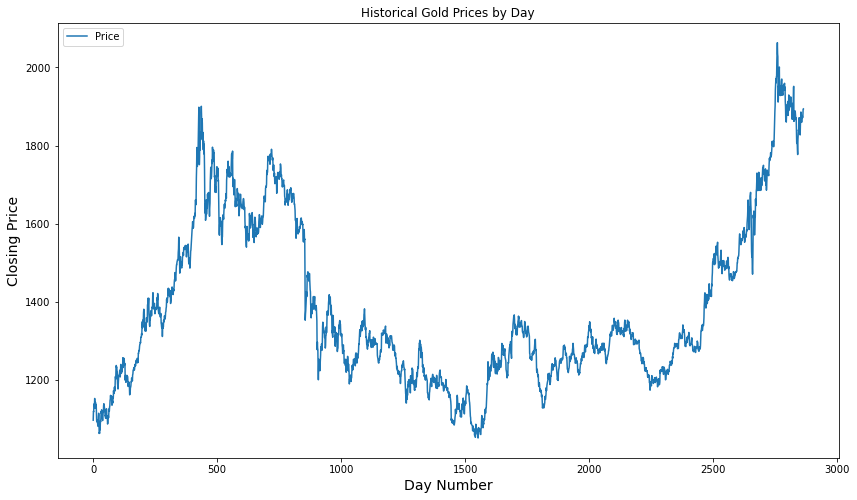

In [32]:
# plot close price vs. time to review completeness and shape of data

data.plot(y='Price', figsize=(14,8))
plt.xlabel('Day Number', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('Historical Gold Prices by Day')
plt.show()

C:\Users\dave\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.8662801015226045
Kurtosis: -0.204758


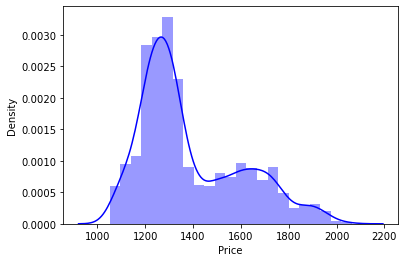

In [33]:
# check target variable

sns.distplot(data['Price'], color = 'blue')
print('Skewness: %f', data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

In [34]:
data.tail()

,Date,Price,High,Low
2860,2020-12-25,1875.82,1877.07,1877.07
2861,2020-12-28,1871.19,1900.53,1869.21
2862,2020-12-29,1877.99,1886.91,1870.99
2863,2020-12-30,1893.37,1894.06,1875.66
2864,2020-12-31,1893.81,1900.40,1885.55


In [35]:
test = data.tail(100)
#test

In [36]:
High = test.High.values
Low = test.Low.values
Price = test.Price.values

In [37]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Price[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
#X

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

In [39]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [40]:
price = np.array(X_train)
price2 = np.array(X_train)
price_normalizer = preprocessing.Normalization(input_shape=[1,])
price_normalizer.adapt(price)
price_normalizer2 = preprocessing.Normalization(input_shape=[1,])
price_normalizer2.adapt(price2)

In [41]:
price_model = tf.keras.Sequential([
#price_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])

In [42]:
price_model.predict(X_test[:10])

array([[-32.994553],
       [-33.787777],
       [-33.62709 ],
       [-34.294632],
       [-34.147568],
       [-34.01026 ],
       [-35.21702 ],
       [-33.060356],
       [-34.765373],
       [-34.92778 ]], dtype=float32)

In [43]:
price_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [44]:
%%time
history = price_model.fit(
    X_train, y_train,
    epochs=300,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/300
64/64 - 0s - loss: 1926.8538 - accuracy: 0.0000e+00 - val_loss: 1931.0133 - val_accuracy: 0.0000e+00
Epoch 2/300
64/64 - 0s - loss: 1919.1630 - accuracy: 0.0000e+00 - val_loss: 1922.8943 - val_accuracy: 0.0000e+00
Epoch 3/300
64/64 - 0s - loss: 1911.0354 - accuracy: 0.0000e+00 - val_loss: 1914.6427 - val_accuracy: 0.0000e+00
Epoch 4/300
64/64 - 0s - loss: 1902.8073 - accuracy: 0.0000e+00 - val_loss: 1906.3140 - val_accuracy: 0.0000e+00
Epoch 5/300
64/64 - 0s - loss: 1894.4777 - accuracy: 0.0000e+00 - val_loss: 1897.3080 - val_accuracy: 0.0000e+00
Epoch 6/300
64/64 - 0s - loss: 1885.1837 - accuracy: 0.0000e+00 - val_loss: 1887.4144 - val_accuracy: 0.0000e+00
Epoch 7/300
64/64 - 0s - loss: 1875.2790 - accuracy: 0.0000e+00 - val_loss: 1877.3445 - val_accuracy: 0.0000e+00
Epoch 8/300
64/64 - 0s - loss: 1865.2016 - accuracy: 0.0000e+00 - val_loss: 1867.0422 - val_accuracy: 0.0000e+00
Epoch 9/300
64/64 - 0s - loss: 1854.9091 - accuracy:

Epoch 73/300
64/64 - 0s - loss: 971.0205 - accuracy: 0.0000e+00 - val_loss: 959.5339 - val_accuracy: 0.0000e+00
Epoch 74/300
64/64 - 0s - loss: 948.4303 - accuracy: 0.0000e+00 - val_loss: 936.4479 - val_accuracy: 0.0000e+00
Epoch 75/300
64/64 - 0s - loss: 925.3203 - accuracy: 0.0000e+00 - val_loss: 912.8213 - val_accuracy: 0.0000e+00
Epoch 76/300
64/64 - 0s - loss: 901.6633 - accuracy: 0.0000e+00 - val_loss: 888.6461 - val_accuracy: 0.0000e+00
Epoch 77/300
64/64 - 0s - loss: 877.4637 - accuracy: 0.0000e+00 - val_loss: 863.9005 - val_accuracy: 0.0000e+00
Epoch 78/300
64/64 - 0s - loss: 852.6903 - accuracy: 0.0000e+00 - val_loss: 838.5676 - val_accuracy: 0.0000e+00
Epoch 79/300
64/64 - 0s - loss: 827.2831 - accuracy: 0.0000e+00 - val_loss: 812.6342 - val_accuracy: 0.0000e+00
Epoch 80/300
64/64 - 0s - loss: 801.3730 - accuracy: 0.0000e+00 - val_loss: 786.1674 - val_accuracy: 0.0000e+00
Epoch 81/300
64/64 - 0s - loss: 774.8406 - accuracy: 0.0000e+00 - val_loss: 759.1364 - val_accuracy: 0.0

Epoch 148/300
64/64 - 0s - loss: 7.9289 - accuracy: 0.0000e+00 - val_loss: 7.2207 - val_accuracy: 0.0000e+00
Epoch 149/300
64/64 - 0s - loss: 7.9404 - accuracy: 0.0000e+00 - val_loss: 7.2207 - val_accuracy: 0.0000e+00
Epoch 150/300
64/64 - 0s - loss: 7.9308 - accuracy: 0.0000e+00 - val_loss: 7.2195 - val_accuracy: 0.0000e+00
Epoch 151/300
64/64 - 0s - loss: 8.0255 - accuracy: 0.0000e+00 - val_loss: 7.2139 - val_accuracy: 0.0000e+00
Epoch 152/300
64/64 - 0s - loss: 7.9476 - accuracy: 0.0000e+00 - val_loss: 7.2188 - val_accuracy: 0.0000e+00
Epoch 153/300
64/64 - 0s - loss: 7.9284 - accuracy: 0.0000e+00 - val_loss: 7.2217 - val_accuracy: 0.0000e+00
Epoch 154/300
64/64 - 0s - loss: 7.9529 - accuracy: 0.0000e+00 - val_loss: 7.2240 - val_accuracy: 0.0000e+00
Epoch 155/300
64/64 - 0s - loss: 7.9301 - accuracy: 0.0000e+00 - val_loss: 7.2207 - val_accuracy: 0.0000e+00
Epoch 156/300
64/64 - 0s - loss: 7.9419 - accuracy: 0.0000e+00 - val_loss: 7.2157 - val_accuracy: 0.0000e+00
Epoch 157/300
64/64

Epoch 224/300
64/64 - 0s - loss: 7.9438 - accuracy: 0.0000e+00 - val_loss: 7.2196 - val_accuracy: 0.0000e+00
Epoch 225/300
64/64 - 0s - loss: 8.0020 - accuracy: 0.0000e+00 - val_loss: 7.2218 - val_accuracy: 0.0000e+00
Epoch 226/300
64/64 - 0s - loss: 7.9900 - accuracy: 0.0000e+00 - val_loss: 7.2161 - val_accuracy: 0.0000e+00
Epoch 227/300
64/64 - 0s - loss: 7.9374 - accuracy: 0.0000e+00 - val_loss: 7.2218 - val_accuracy: 0.0000e+00
Epoch 228/300
64/64 - 0s - loss: 7.9439 - accuracy: 0.0000e+00 - val_loss: 7.2282 - val_accuracy: 0.0000e+00
Epoch 229/300
64/64 - 0s - loss: 8.0137 - accuracy: 0.0000e+00 - val_loss: 7.2283 - val_accuracy: 0.0000e+00
Epoch 230/300
64/64 - 0s - loss: 8.0007 - accuracy: 0.0000e+00 - val_loss: 7.2526 - val_accuracy: 0.0000e+00
Epoch 231/300
64/64 - 0s - loss: 7.9994 - accuracy: 0.0000e+00 - val_loss: 7.2648 - val_accuracy: 0.0000e+00
Epoch 232/300
64/64 - 0s - loss: 7.9939 - accuracy: 0.0000e+00 - val_loss: 7.2199 - val_accuracy: 0.0000e+00
Epoch 233/300
64/64

Epoch 300/300
64/64 - 0s - loss: 8.0123 - accuracy: 0.0000e+00 - val_loss: 7.2329 - val_accuracy: 0.0000e+00
Wall time: 8.84 s


In [45]:
price_model.save("gold")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: gold\assets


In [46]:
from tensorflow import keras

loaded_model = keras.models.load_model("gold")

In [47]:
# run test inputs to test model
prediction = loaded_model.predict([[1800, 1825]])
print(prediction[0][0])

1813.5251


In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,accuracy,val_loss,val_accuracy,epoch
290,7.999844,0.0,7.233231,0.0,290
291,8.005421,0.0,7.221878,0.0,291
292,8.249294,0.0,7.260902,0.0,292
293,7.983414,0.0,7.221855,0.0,293
294,8.182756,0.0,7.242371,0.0,294
295,8.179647,0.0,7.232582,0.0,295
296,8.042675,0.0,7.222252,0.0,296
297,8.010971,0.0,7.384415,0.0,297
298,8.052080,0.0,7.215286,0.0,298
299,8.012287,0.0,7.232925,0.0,299


In [49]:
predict = price_model.predict(X)
predict

array([[1947.1514],
       [1958.7026],
       [1995.8329],
       [1963.6449],
       [1939.683 ],
       [1932.8556],
       [1942.132 ],
       [1925.6647],
       [1927.6383],
       [1941.7582],
       [1947.6262],
       [1965.1735],
       [1977.2251],
       [1952.6749],
       [1936.0258],
       [1929.0021],
       [1932.8016],
       [1923.046 ],
       [1934.9655],
       [1953.516 ],
       [1947.3739],
       [1949.5464],
       [1960.0907],
       [1961.3546],
       [1947.6328],
       [1950.746 ],
       [1917.649 ],
       [1907.018 ],
       [1879.5009],
       [1862.3239],
       [1863.564 ],
       [1865.582 ],
       [1886.9991],
       [1891.525 ],
       [1897.7687],
       [1902.9056],
       [1902.1324],
       [1896.7655],
       [1885.233 ],
       [1891.0348],
       [1911.2688],
       [1925.664 ],
       [1905.3062],
       [1897.1315],
       [1899.0533],
       [1905.6342],
       [1907.5021],
       [1904.1919],
       [1919.2792],
       [1909.7784],


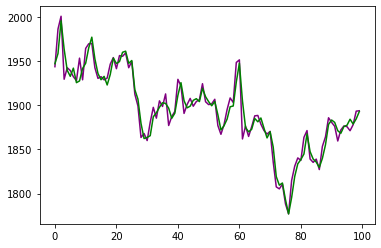

In [50]:
test_plt = test['Price'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')


In [51]:
# convert predictions array above to a dataframe for future export to csv

predict_df = pd.DataFrame(predict, columns = ['Prediction'])
predict_df

,Prediction
0,1947.151367
1,1958.702637
2,1995.832886
3,1963.644897
4,1939.682983
...,...
95,1877.361938
96,1884.245728
97,1878.776245
98,1884.613525


In [52]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  100 non-null    float32
dtypes: float32(1)
memory usage: 528.0 bytes


In [53]:
last_100_df = data.iloc[-100:]
last_100_df

,Date,Price,High,Low
2765,2020-08-14,1943.76,1962.84,1932.65
2766,2020-08-17,1986.45,1990.65,1929.74
2767,2020-08-18,2000.95,2015.45,1977.84
2768,2020-08-19,1929.54,2006.68,1924.82
2769,2020-08-20,1942.60,1955.44,1925.12
...,...,...,...,...
2860,2020-12-25,1875.82,1877.07,1877.07
2861,2020-12-28,1871.19,1900.53,1869.21
2862,2020-12-29,1877.99,1886.91,1870.99
2863,2020-12-30,1893.37,1894.06,1875.66


In [54]:
last_100_df = last_100_df.reset_index(drop=True)
last_100_df

,Date,Price,High,Low
0,2020-08-14,1943.76,1962.84,1932.65
1,2020-08-17,1986.45,1990.65,1929.74
2,2020-08-18,2000.95,2015.45,1977.84
3,2020-08-19,1929.54,2006.68,1924.82
4,2020-08-20,1942.60,1955.44,1925.12
...,...,...,...,...
95,2020-12-25,1875.82,1877.07,1877.07
96,2020-12-28,1871.19,1900.53,1869.21
97,2020-12-29,1877.99,1886.91,1870.99
98,2020-12-30,1893.37,1894.06,1875.66


In [55]:
last_100_df = pd.concat([last_100_df, predict_df], axis=1)
last_100_df

,Date,Price,High,Low,Prediction
0,2020-08-14,1943.76,1962.84,1932.65,1947.151367
1,2020-08-17,1986.45,1990.65,1929.74,1958.702637
2,2020-08-18,2000.95,2015.45,1977.84,1995.832886
3,2020-08-19,1929.54,2006.68,1924.82,1963.644897
4,2020-08-20,1942.60,1955.44,1925.12,1939.682983
...,...,...,...,...,...
95,2020-12-25,1875.82,1877.07,1877.07,1877.361938
96,2020-12-28,1871.19,1900.53,1869.21,1884.245728
97,2020-12-29,1877.99,1886.91,1870.99,1878.776245
98,2020-12-30,1893.37,1894.06,1875.66,1884.613525


In [56]:
last_100_df = last_100_df[['Date', 'Price', 'Prediction', 'Low', 'High']]
last_100_df

,Date,Price,Prediction,Low,High
0,2020-08-14,1943.76,1947.151367,1932.65,1962.84
1,2020-08-17,1986.45,1958.702637,1929.74,1990.65
2,2020-08-18,2000.95,1995.832886,1977.84,2015.45
3,2020-08-19,1929.54,1963.644897,1924.82,2006.68
4,2020-08-20,1942.60,1939.682983,1925.12,1955.44
...,...,...,...,...,...
95,2020-12-25,1875.82,1877.361938,1877.07,1877.07
96,2020-12-28,1871.19,1884.245728,1869.21,1900.53
97,2020-12-29,1877.99,1878.776245,1870.99,1886.91
98,2020-12-30,1893.37,1884.613525,1875.66,1894.06


In [57]:
last_30_df = last_100_df.iloc[-30:]
last_30_df

,Date,Price,Prediction,Low,High
70,2020-11-20,1870.49,1870.047241,1860.66,1879.98
71,2020-11-23,1835.85,1852.736450,1830.85,1876.72
72,2020-11-24,1807.51,1819.140747,1800.69,1839.26
73,2020-11-25,1805.30,1809.462280,1801.33,1817.98
74,2020-11-26,1810.57,1811.945435,1805.31,1818.78
75,2020-11-27,1788.13,1792.998657,1773.93,1813.81
76,2020-11-30,1777.02,1776.895630,1764.69,1789.99
77,2020-12-01,1814.87,1795.600464,1775.52,1817.55
78,2020-12-02,1831.01,1819.363403,1806.99,1832.65
79,2020-12-03,1840.36,1833.708618,1823.60,1844.45


In [58]:
last_30_df.to_csv(r'resources\30_Days_Gold_Predict.csv', index = False)